In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("car_data.csv")

In [6]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [10]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [12]:
df = pd.get_dummies(df,columns = ['Gender'],drop_first = True)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

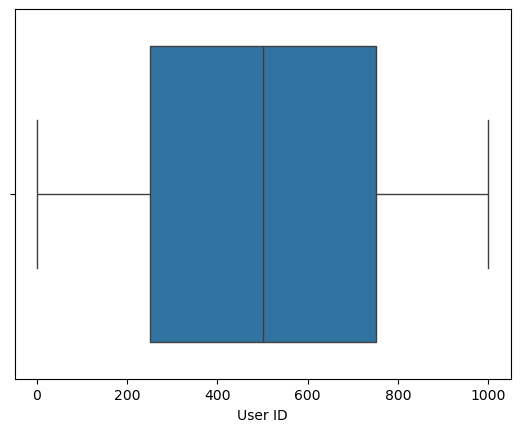

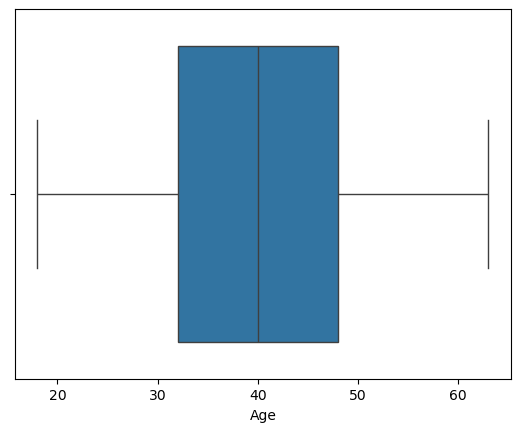

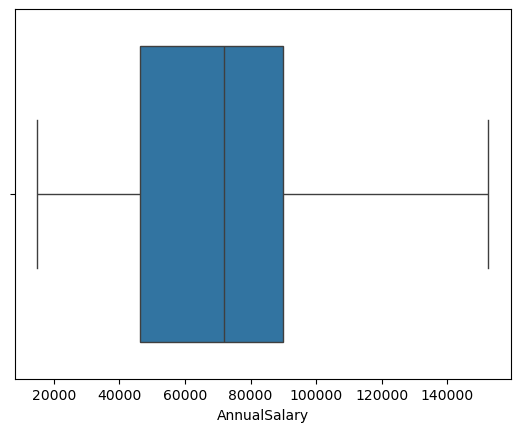

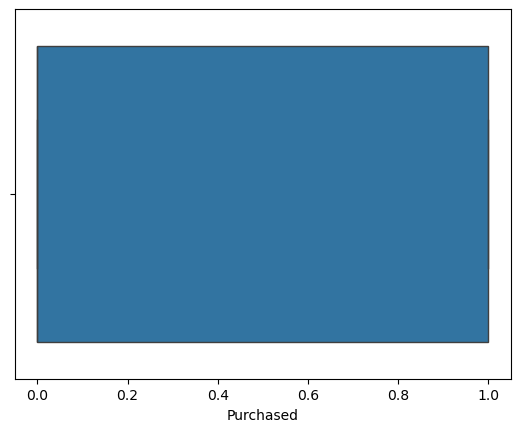

In [16]:
for i in df.select_dtypes(include = "number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [18]:
x = df.drop(['User ID','Purchased'],axis=1)
y = df['Purchased']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
x_train

,Age,AnnualSalary,Gender_Male
687,26,84000,False
500,40,57000,True
332,33,19500,True
979,32,59500,True
817,37,53500,True
...,...,...,...
835,42,53500,True
192,26,118000,False
629,61,84500,True
559,30,62000,False


In [24]:
y_train

687    0
500    0
332    0
979    0
817    0
      ..
835    0
192    0
629    1
559    0
684    0
Name: Purchased, Length: 800, dtype: int64

In [30]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [34]:
scaler.fit(x_train)

StandardScaler()

In [36]:
x_train = scaler.transform(x_train)

In [38]:
x_test = scaler.transform(x_test)

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf = RandomForestClassifier()

In [44]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
y_pred = rf.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_pred,y_test)

0.91

In [52]:
#hyperparameter tuning

In [54]:
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [10,20,30,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features':['sqrt','auto','log2'],
    'bootstrap':[True,False]
}

In [56]:
from sklearn.model_selection import GridSearchCV

In [60]:
grid_search = GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid = param_grid,
    cv = 5,
    n_jobs = -1,
    verbose = 2
)

In [62]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
421 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [63]:
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [66]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(x_test)
best_accuracy = accuracy_score(y_test,y_pred_best)

In [68]:
print(best_accuracy)

0.925
